### Statement: ACME Insurance Inc. offers affordable health insurance to thousands of customer all over the United States. As the lead data scientist at ACME , you're tasked with creating an autoamted sysrem to estimate the annual medical expenditure for new customers, using information such as their age, sex, BMI, children, smoking habits and region of residence.<br>
Estimates from your system will be used to determine the annual insurance premium (amount paid every month) offered to the customer. Due to regulatory requirements, you must be able to explain why your system outputs a certain prediction

# 1. Loading the Dataset & checking the Reliability of data

In [1]:
import pandas as pd

In [2]:
insurance_df = pd.read_csv('insurance.csv')

In [4]:
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Checking the datatypes of columns

In [5]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Looks like the dataset contains no null entries and the data type of each column is alright.

Checking some statistics for numerical columns

In [6]:
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


The ranges of values in the numerical columns seem reasonable too (no negative ages). So we don't have to do much of data cleaning or correction

The 'charges' column seems to be significantly skewed however as the median(50 percentile) is much lower than the maximum value

# 2. Exploaratory Data Analysis & Visualization

We'll visualize the relationship between 'charges' column and other column

Libraries used for visualization - Matplotlib, Seaborn & Plotly

In [12]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

Setting the default parameters

In [9]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 13
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Age

Minimum age is 18 and the maximum age is 64.<br> Thus we can visualize the distribution of age using 'Histogram' with 47 bins (one for each year) & a abox plot

In [10]:
insurance_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

Way 1 - To create histogram using matplotlib pyplot

In [31]:
# plt.title('Age Distribution');
# plt.hist(x = 'age', data = insurance_df, bins = np.arange(18, 64, 1));
# plt.xlabel('Years');
# plt.ylabel('Count of people');

Way 2 - To create histogram using plotly express

In [22]:
age_fig = px.histogram(insurance_df, x = 'age', marginal = 'box', nbins = 47, title = 'Distribution of Age');
age_fig.update_layout(bargap = 0.1);
age_fig

By using marginal = 'box', plotly will also plot a box plot above the histogram for us

Conclusion - The distribution of age is uniform from age 20 onwards i.e between 20 to 30 people for every age. But for age 18 & 19, this ages have twice the customers as compared to other ages

## BMI

Visualizing the distribution of BMI of customers, using a histogram and box plot

In [30]:
bmi_fig = px.histogram(insurance_df, x = 'bmi', marginal = 'box', color_discrete_sequence = ['red'], title = 'Distribution of BMI');
bmi_fig.update_layout(bargap = 0.1);
bmi_fig 

Normal / Gaussian Distribution - The distribution in which most of the values are centered around a single value (i.e the mean) & then have the decreasing probability as you go away from that mean, that is called as Normal or Gaussian Distribution

Conclusion : The BMI distribution is a Gaussian distribution where most of the values of BMI are centered around 30, probably between (25 to 35)

Interpreting BMI values: <br> < 18.5  underweight <br> 18.5 - 24.9. Normal Weight <br> 25 - 29.9 Overweight<br> 30 - 39.9  Obesity<br> > 40  Morbid Obesity

Interpretation : Here more people are overweight

## Charges

Visualizing the distribution of 'charges' i.e the annual medical charges for customers by using Histogram <br> We'll also use categorical column 'smoker' to distinguish the charges for smokers & non-smokers

In-general histogram (Combined smokers and non-smokers)

In [36]:
charge_fig = px.histogram(insurance_df, x = 'charges', marginal = 'box', title = 'Distribution of Annual Medical Charges');
charge_fig.update_layout(bargap = 0.1)
charge_fig

Histogram differencing charges for 'Smoker' and 'Non-smoker'

In [39]:
charge_fig = px.histogram(insurance_df, x = 'charges', marginal = 'box', color = 'smoker', color_discrete_sequence=['green', 'grey'] ,title = 'Distribution of Annual Medical Charges [Smoker Vs Non-Smoker]');
charge_fig.update_layout(bargap = 0.1)
charge_fig

Conclusion : People who don't smoke have lower medical charges

Power Law - In power Law, you have lot of people along the smaller numbers/range

In [43]:
insurance_df.sex.unique()

array(['female', 'male'], dtype=object)

In [45]:
charge_fig = px.histogram(insurance_df, x = 'charges', marginal = 'box', color = 'sex', color_discrete_sequence=['cadetblue', 'darkblue'] ,title = 'Distribution of Annual Medical Charges [Male vs Female]')
charge_fig.update_layout(bargap = 0.1);
charge_fig

Conclusion : Most women have lower medical charges

In [46]:
insurance_df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [50]:
charge_fig = px.histogram(insurance_df, x = 'charges', marginal = 'box', color = 'region', color_discrete_sequence=['darkorange', 'orange', 'bisque', 'oldlace'] ,title = 'Distribution of Annual Medical Charges [Region Wise]')
charge_fig.update_layout(bargap = 0.1);
charge_fig

Conclusion : Mostly the count of people falling in particular charge bar are equally distributed

## Smoker

Visualizing the distribution of 'smoker' column using a histogram

In [51]:
insurance_df.smoker.unique()

array(['yes', 'no'], dtype=object)

In [52]:
insurance_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [59]:
px.histogram(insurance_df, x = 'smoker', color_discrete_sequence=['gray'], title = 'Smoker [Yes/ No]')

Conclusion - Most people are not the smokers

In [57]:
px.histogram(insurance_df, x = 'smoker', color = 'sex' , color_discrete_sequence=['peru', 'sandybrown'] ,title = 'Smoker [Yes/ No] - Sexwise Distribution')

Conclusion : It appears that only 20% customers have reported that they smoke

In [63]:
px.histogram(insurance_df, x = 'smoker', color = 'region' , color_discrete_sequence=['steelblue', 'deepskyblue', 'skyblue', 'powderblue'] ,title = 'Smoker [Yes/ No] - Region Wise Distribution')

Conclusion: It seems that most smokers are from 'SouthEast' Region. While the distribution of non-smokers in equal

## Age & Charges

Visualising relationship between age and charges using a scatterplot

In [71]:
age_charge = px.scatter(insurance_df, x = 'age', color = 'smoker', y ='charges', opacity = 0.8, hover_data = ['sex'] ,title = 'Age Vs Charges')
age_charge.update_traces(marker_size = 5)
age_charge

Conclusion : We can say that there are three cluster of points which seem to form a line with an increasing slope<br> 1. The first & the largest cluster primarily consist of 'healthy non-smokers' who have relatively low medical charges than others<br> 2. The second cluster contains a mix of smokers and non-smokers. It can actually have two distinct perspectives: (i) Non-smokers with medical issues  (ii) Smokers with no major medical issue<br> 3. The final cluster consists exclusively of smokers (presumably smokers with major medical condition)

## BMI & Charge

Visualising relationship between BMI and charge using a scatter plot

In [73]:
bmi_charge = px.scatter(insurance_df, x = 'bmi', color = 'smoker', y ='charges', opacity = 0.8, hover_data = ['sex'] ,title = 'BMI Vs Charges')
bmi_charge.update_traces(marker_size = 5)
bmi_charge

Conclusion: From that continuous red cluster we can assume that there is no relationship between BMI & charges (for non-smokers)<br> But for smokers, we can observe an incresing slope i.e that charges are less for smokers having BMI less than 30 while the charges are high for smokers with BMI greater than 30 

## Childres Vs Charges

In [76]:
px.violin(insurance_df, x = 'children', y = 'charges')

Conclusion : We can see that the bulk of values shift up as the no.of childrens increases.

## Correlation

From the analysis we can say that, some columns are closesly related to charges while some dont<br> Like 'age & charges' are related but 'bmi & charges' are not

Correlation coefficient (.corr) - used to numerically represent this correlation 

In [77]:
# Age and charges
insurance_df.charges.corr(insurance_df.age)

0.29900819333064765

In [78]:
# BMI & charges
insurance_df.charges.corr(insurance_df.bmi)

0.19834096883362884

Concluison : There is higher correlation between age & charges as compared to bmi & charges

In [80]:
# children & charges
insurance_df.charges.corr(insurance_df.children)

0.06799822684790482

#### Computing correlation for categorical columns

step 1 - Convert the categorical data into numeric data

In [87]:
# Creating a pandas series
smoker_values = {'no' : 0, 'yes' : 1}
#This dictionary will convert 'no' value to 0 and 'yes' value to 1
smoker_numeric = insurance_df.smoker.map(smoker_values)
smoker_numeric

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [88]:
# Now computing correlation
insurance_df.charges.corr(smoker_numeric)

0.7872514304984766

Conclusion : This is probably the highest correlation

Correlation Coefficient is always between -1 to 1<br> -1 or 1 represets perfectly linear relationship

In [91]:
from urllib.request import urlretrieve

In [96]:
urlretrieve('https://www.shutterstock.com/image-vector/types-correlation-strong-weak-perfect-600nw-2220285591.jpg','correlation.jpg')

('correlation.jpg', <http.client.HTTPMessage at 0x7f797afc2dd0>)

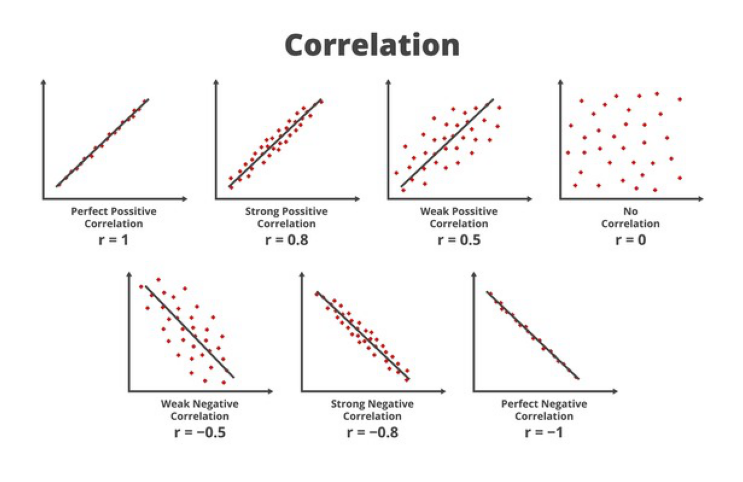

In [99]:
from PIL import Image
img = Image.open('correlation.jpg');
plt.grid(False)
plt.axis('off')
plt.imshow(img);

Computing correlation between all columns

In [138]:
insurance_df_numeric = insurance_df.apply(pd.to_numeric, errors = 'coerce')
insurance_df_numeric.drop(columns = ['sex', 'smoker', 'region'], inplace = True)
insurance_df_numeric.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


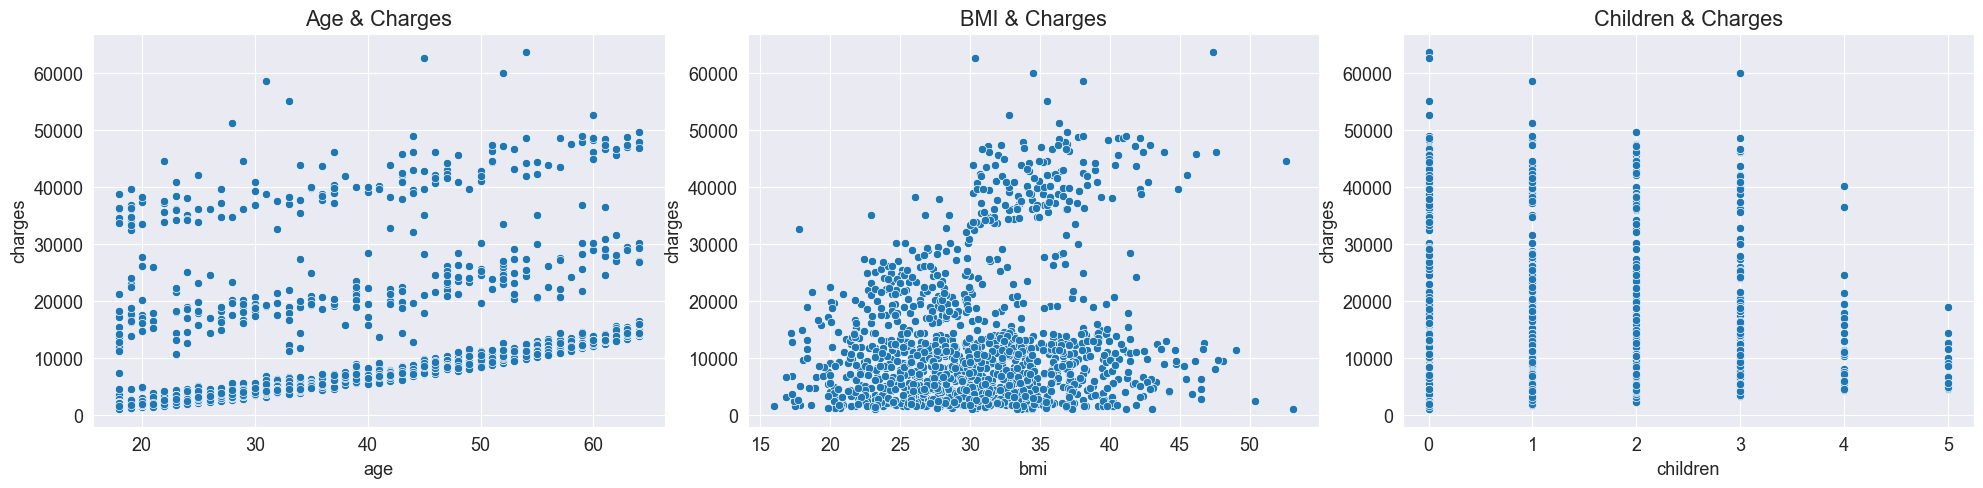

In [133]:
fig, axes = plt.subplots(1, 3, figsize = (20,5));
plt.tight_layout(pad = 2);

#Age & charges
axes[0].set_title('Age & Charges');
sns.scatterplot(insurance_df,x = 'age', y = 'charges', ax = axes[0]);

#bmi & charges
axes[1].set_title('BMI & Charges');
sns.scatterplot(insurance_df,x = 'bmi', y = 'charges' ,ax = axes[1]);

#children & charges
axes[2].set_title('Children & Charges');
sns.scatterplot(insurance_df,x = 'children', y = 'charges' ,ax = axes[2]);

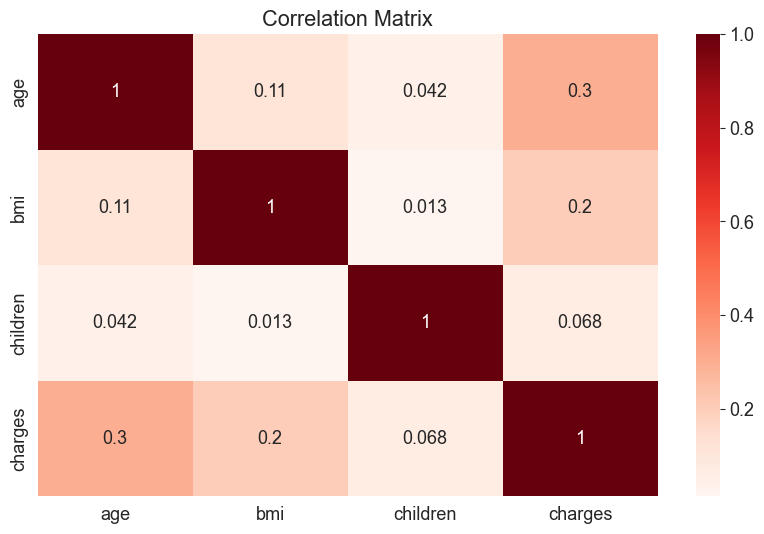

In [141]:
# Visualizing correlation using Heatmap
plt.title('Correlation Matrix');
sns.heatmap(insurance_df_numeric.corr(), cmap='Reds', annot = True);

# 3. Linear Regression using a Single Feature

### (I) - Considering people who don't smoke

As we analyzed that 'age' & 'smoker' have the strongest correlation with 'charges'.<br>So here we'll find a way of estimating the value of "charges" using the value of "age" (Considering that all are non-smokers)

In [143]:
age_non_smoker = insurance_df[insurance_df.smoker == 'no']
age_non_smoker 

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


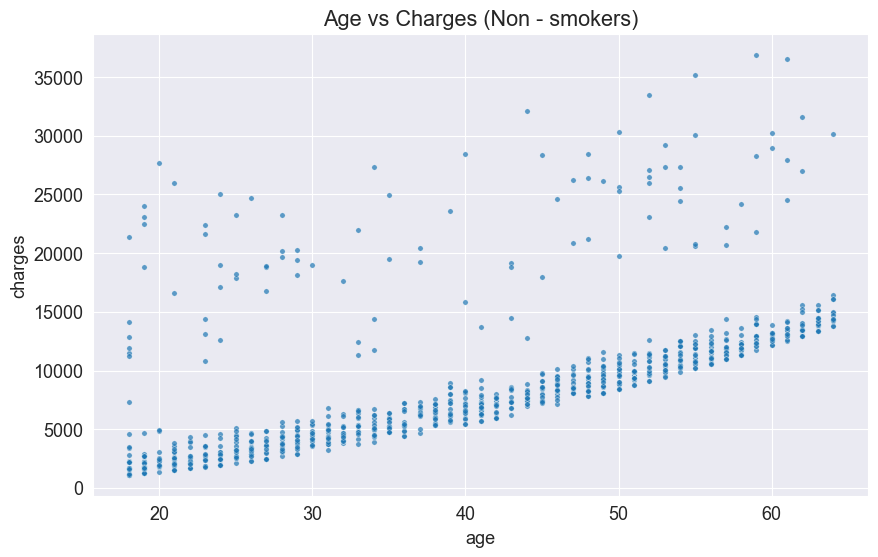

In [150]:
plt.title('Age vs Charges (Non - smokers)');
sns.scatterplot(x = 'age', y='charges', data = age_non_smoker, alpha = 0.7, s = 15);

## Model

Apart from few exceptions the points seem to form a line we'll try and fit a line using these points and use the line to predict charges for given age<br> A line on X & Y coordinattes has the following formula :<br> y = wx + b  [where w = slope(weight) & b = interval(bias),  x-axis = age, y-axis = charges]<br> charges = w * age + b <br>
This technique is called as linear regression, and call the above equation a linear regression model because it models the relationship between 'age' and 'charges' as a straight line

In [151]:
# helper function
def estimate_charges(age, w, b):
    return w * age + b

This 'estimate_charges' function is our first model

In [152]:
# Assuming the values of 'w' & 'b'
w = 50
b = 100

In [154]:
estimate_charges(40, w, b)

2100

In [156]:
ages = age_non_smoker.age
ages 

1       18
2       28
3       33
4       32
5       31
        ..
1332    52
1333    50
1334    18
1335    18
1336    21
Name: age, Length: 1064, dtype: int64

In [158]:
estimate_charges_result = estimate_charges(ages, w, b)
estimate_charges_result

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

We can plot the estimated charges using a line graph

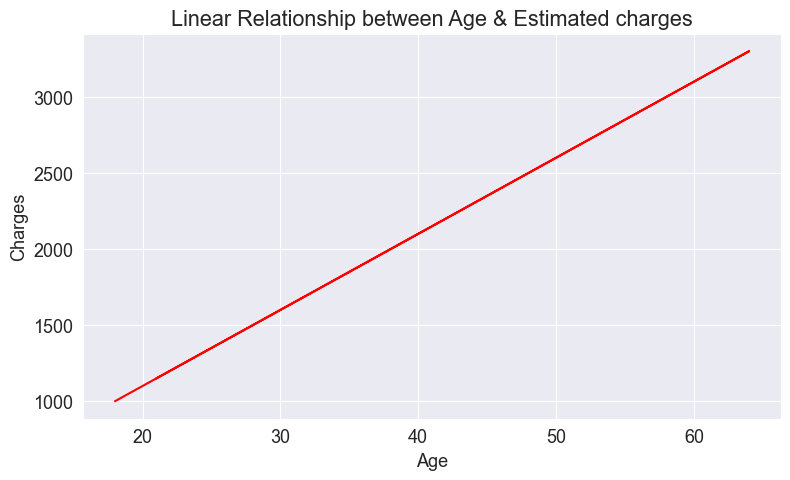

In [170]:
plt.figure(figsize = (9,5))
plt.title('Linear Relationship between Age & Estimated charges');
plt.plot(ages, estimate_charges_result, c='r');
plt.xlabel('Age');
plt.ylabel('Charges');

As we expected the points lie on the same line

### We can overlay this line on the actual data, to see how well our model fits the data

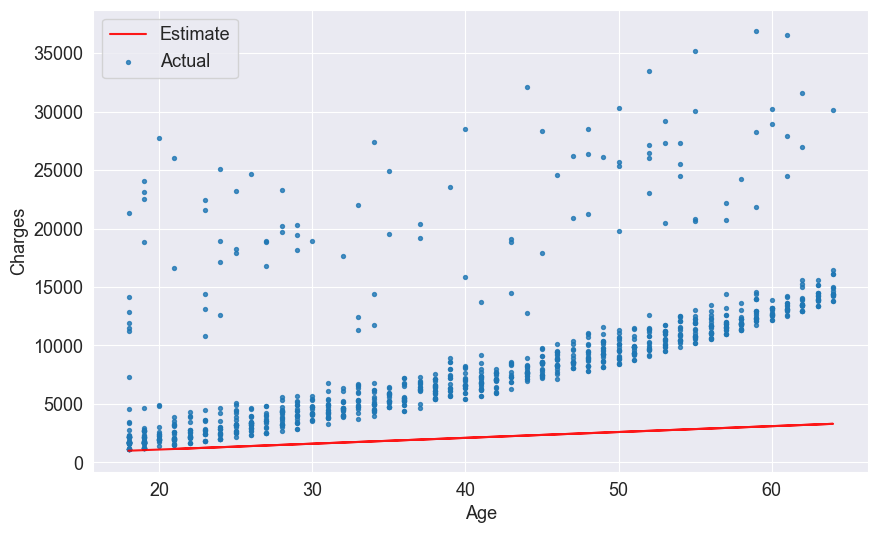

In [175]:
plt.plot(ages, estimate_charges_result, c='r', alpha = 0.9);
plt.scatter(ages, age_non_smoker.charges, s = 8, alpha = 0.8);
plt.xlabel('Age');
plt.ylabel('Charges');
plt.legend(['Estimate', 'Actual']);

We can clearly see that our estimates are quite poor and the line does not fit the data.<br> However we can try different values of 'w' & 'b' to move the line around

In [177]:
#This helper function will take w & b as inputs and create above plot
def try_parameters(w, b):
    ages = age_non_smoker.age
    target = age_non_smoker.charges
    
    estimate_charges_result = estimate_charges(ages, w, b)
    plt.plot(ages, estimate_charges_result, c='r', alpha = 0.9);
    plt.scatter(ages, target, s = 8, alpha = 0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges');
    plt.legend(['Estimate', 'Actual']);

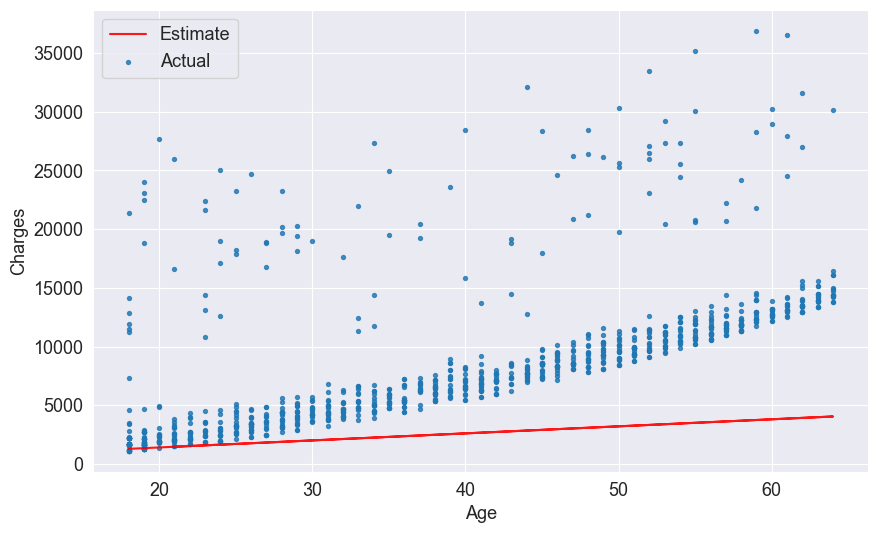

In [180]:
try_parameters(60, 200)

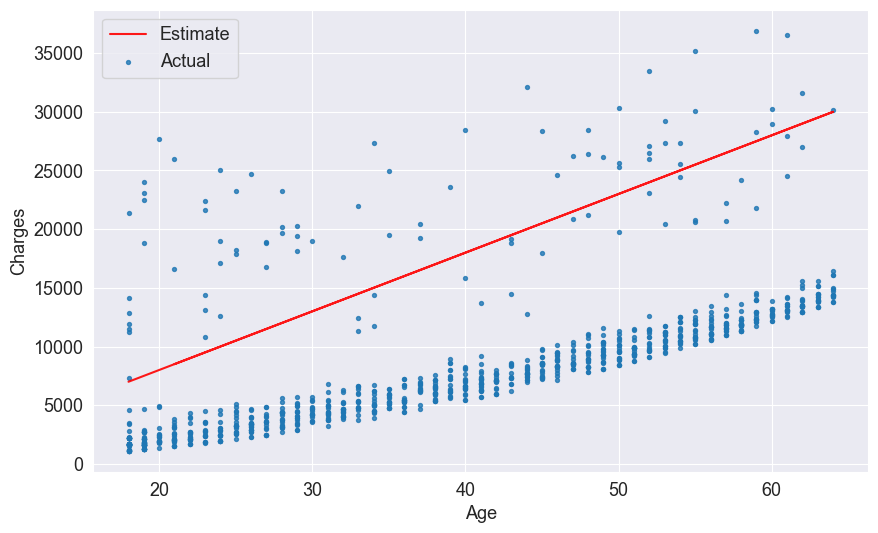

In [192]:
try_parameters(500, -2000);

Conclusion : So on trial & error basis we finally fit the line 

1.We need a way to measure numerically how well the line fits the points<br> 2. Once the 'measure of fit' has been co mputed we need a way to modify 'w' and 'b' to improve the fit

## Root Mean Squared Error (RMSE)

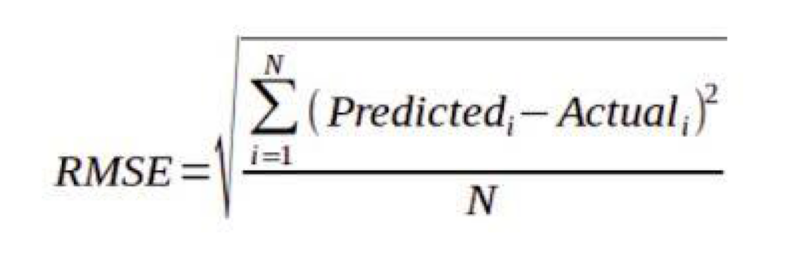

In [195]:
urlretrieve('https://media.geeksforgeeks.org/wp-content/uploads/20200622171741/RMSE1.jpg', 'rmse.jpg');
rmse_formula = Image.open('rmse.jpg')
plt.grid(False)
plt.axis('off')
plt.imshow(rmse_formula);

In [197]:
target = age_non_smoker.charges
target.head(5)

1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
5     3756.62160
Name: charges, dtype: float64

In [200]:
prediction = estimate_charges_result
prediction.head(5)

1    1000
2    1500
3    1750
4    1700
5    1650
Name: age, dtype: int64

1.Calculate the difference between targests and prediction<br> Eg. 1000 - 1725 or 1500 - 4449<br>2. To remove negative values take square<br> (1000 - 1725)^2<br> 3.Calcluate the average of elements<br> ((1000-1725)^2 + (1500-4449)^2) / 2<br>4. Take the Square root of the result<br> sqrt((1000-1725)^2 + (1500-4449)^2)

In [201]:
# Helper function
def rmse(target, prediction):
    return np.sqrt(np.mean(np.square(target - prediction)))

Let's compute the RMSE for our model with a sample set of weights

In [202]:
w = 50
b = 100

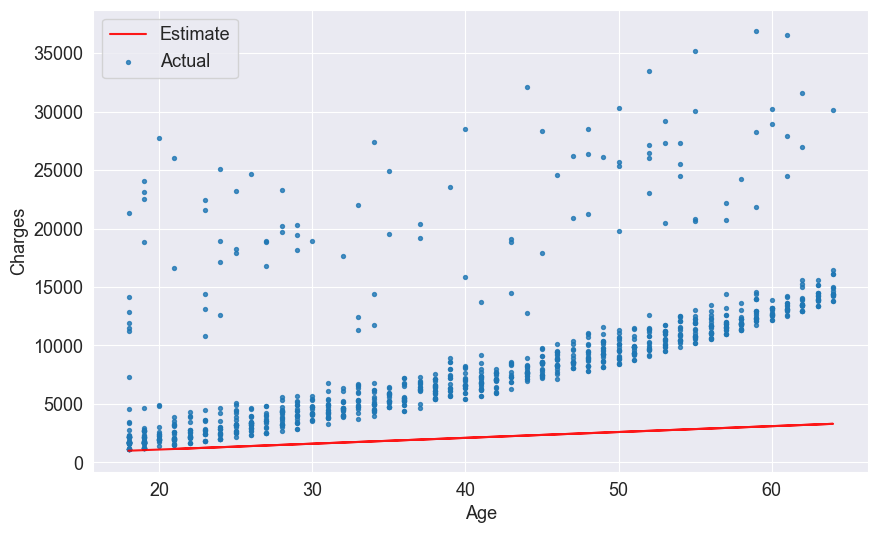

In [203]:
try_parameters(w, b);

In [212]:
target = age_non_smoker['charges']
predicted = estimate_charges(age_non_smoker.age, w, b);

In [213]:
rmse(target, predicted)

8461.949562575493

This means that each element in the prediction differs from the actual target by '\$'8461 <br> The result is called loss because it indicates how bad the model is at predicting the target variables <br> It represents information loss in the model: the lower the loss the better the model

In [215]:
# Modifying try_parameters function
def try_parameters(w, b):
    ages = age_non_smoker.age
    target = age_non_smoker.charges
    predictions = estimate_charges(ages, w, b)
    
    plt.plot(ages, predictions, c='r', alpha = 0.9);
    plt.scatter(ages, target, s = 8, alpha = 0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges');
    plt.legend(['Estimate', 'Actual']);
    
    loss = rmse(target, predictions)
    print("RMSE Loss : ", loss)

RMSE Loss :  8461.949562575493


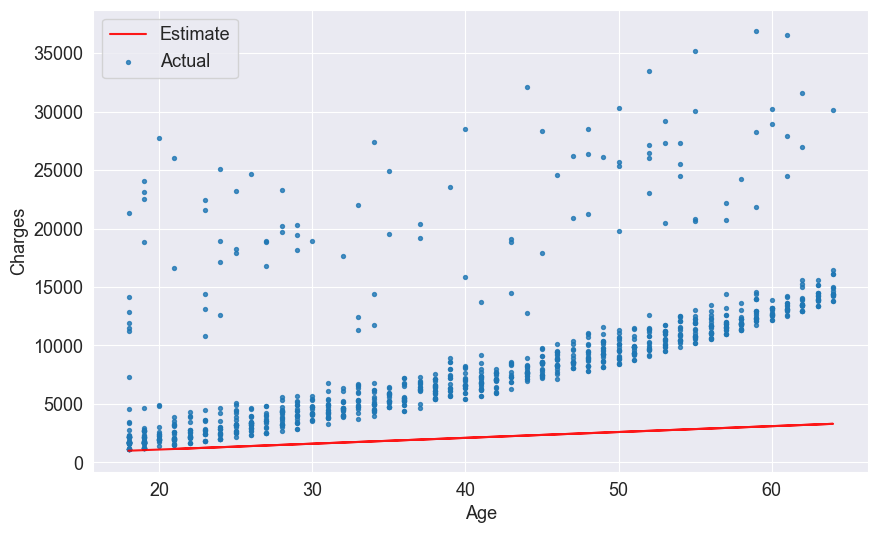

In [216]:
try_parameters(50, 100);

RMSE Loss :  4725.9133994520325


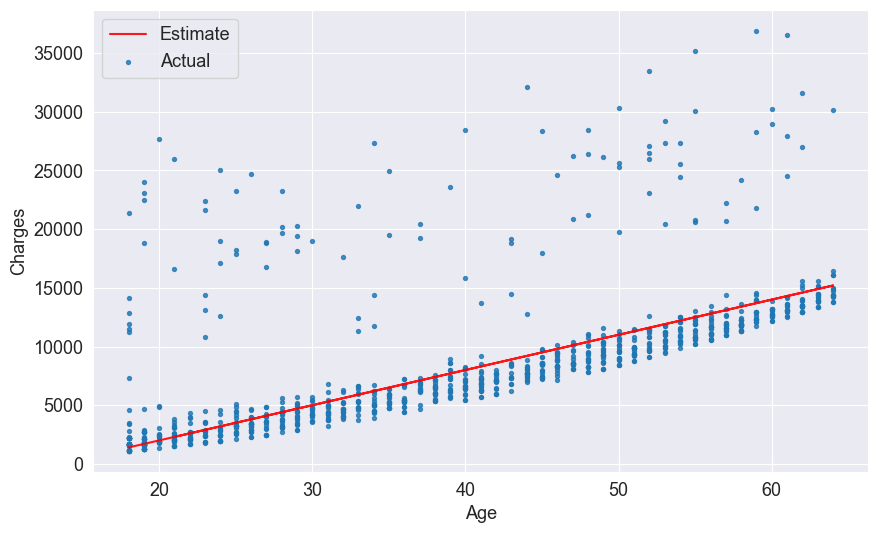

In [257]:
# try_parameters(300, -4000);  = RMSE Loss :  4725.9133994520325
try_parameters(300, -4000);

### Optimizer

We need a strategy to modify weights 'w' & 'b' to reduce the loss and improve the 'fit' of the line to the data<br>
1.Ordinary Least square - better for smaller datasets<br> 2. Stochastic Gradient Descent - better for larger datasets<br> Both of them have the same objective to minimize the loss, however the 'Ordinary Least square' directly computes the best values for 'w' and 'b' using matrix operations, while gradient descent uses a iterative approach, starting with a random values of 'w' & 'b' and slowly improving them using derivatives

## Linear Regression using Scikit - learn

Let's use the 'Linear Regression' class from scikit-learn to find the best fit line for 'age vs charges', using 'Ordinary Least square' technique

### (i) Ordinary Least square Technique

In [239]:
from sklearn.linear_model import LinearRegression

In [240]:
#Creating a new model object
model = LinearRegression()

In [241]:
# Using the 'fit' method to the model to find the best fit line for the inputs and targets
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [247]:
# Now that input 'X' must be a 2-D array, so we'll need to pass a dataframe, instead of a single column
inputs = age_non_smoker[['age']]
targets = age_non_smoker.charges
print(f'inputs.shape : {inputs.shape}, \ntargets.shape : {targets.shape}')

inputs.shape : (1064, 1), 
targets.shape : (1064,)


In [249]:
import warnings
warnings.filterwarnings("ignore")

In [250]:
# Lets fit the model to the data
model.fit(inputs, targets)

LinearRegression()

We can now make predictions using the model<br>Let's try predicting the charges for the ages 23, 37 and 61

In [251]:
model.predict(np.array([[23], [37], [61]]))

array([ 4055.30443855,  7796.78921819, 14210.76312614])

Let's compute the predictions for the entire set of inputs

In [252]:
predictions = model.predict(inputs)

In [253]:
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [255]:
inputs.head(3)

,age
1,18
2,28
3,33


Conclusion : Our model has predicted charge of \\$2719 for person of age 18, \\$5391 for person of age 28 and $6727 for the person of age 33

In [256]:
rmse(targets, predictions)

4662.505766636395

Conslusion : So we reduced our rmse from 4725.9133994520325 to 4662.505766636395

In [260]:
# Finding the value of 'w' and 'b'
print(f'w : {model.coef_} \nb : {model.intercept_}')

w : [267.24891283] 
b : -2091.4205565650864


RMSE Loss :  4662.505766636395


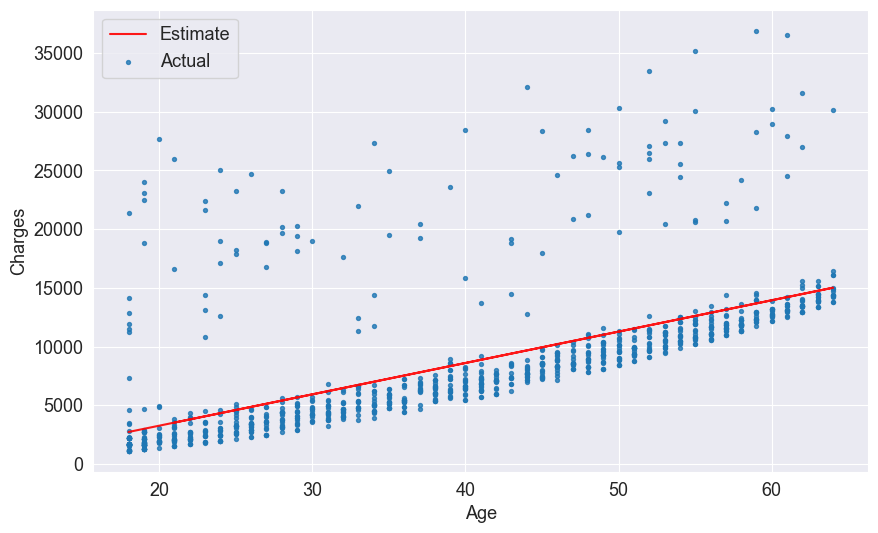

In [262]:
#Plotting it for rmse 4662.505766636395
try_parameters(model.coef_, model.intercept_);

In [265]:
model.predict(np.array([[18], [21], [46], [62]]))

array([ 2719.0598744 ,  3520.80661289, 10202.02943367, 14478.01203897])

Predictions made by our model trained on 'Ordinary Least square' technique<br>Age 18 : Charge 2719<br> Age 21 : Charge 3529<br> Age 46 : Charge 10202<br> Age 62 : Charge 14478

### (ii) Stochastic Gradient Descent Technique

In [267]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [272]:
inputs = age_non_smoker[['age']]
targets = age_non_smoker.charges

In [274]:
# Standardizing the features
scaler = StandardScaler()
inputs_scaled = scaler.fit_transform(inputs)

In [285]:
# Create and fit the SGDRegressor Model
model = SGDRegressor(max_iter = 1000, random_state = 42)
model.fit(inputs_scaled, targets)

SGDRegressor(random_state=42)

In [286]:
# Ready to make predictions
inp_data = np.array([[18], [21], [46], [62]])
inp_data_scaled = scaler.transform(inp_data)
predictions = model.predict(inp_data_scaled)

In [287]:
predictions

array([ 2671.70586523,  3478.1607705 , 10198.61831443, 14499.71114254])

Predictions made by our model trained on 'Stochastic Gradient Descent' technique<br>Age 18 : Charge 2671<br> Age 21 : Charge 3478<br> Age 46 : Charge 10198<br> Age 62 : Charge 14499

Conclusiom : Model trained on 'Ordinary Least square' Technique & 'Stochastic Gradient Descent' Technique have a very slight difference in estimating the charges for the input ages

### (II) - Considering people who smoke

In [305]:
age_smoke = insurance_df[insurance_df.smoker == 'yes']
age_smoke 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1321,62,male,26.695,0,yes,northeast,28101.33305
1323,42,female,40.370,2,yes,southeast,43896.37630


In [306]:
def smoke_try_parameters(w, b):
    ages = age_smoke .age
    target = age_smoke .charges
    predictions = estimate_charges(ages, w, b)
    
    plt.plot(ages, predictions, c='r', alpha = 0.9);
    plt.scatter(ages, target, s = 8, alpha = 0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges');
    plt.legend(['Estimate', 'Actual']);
    
    loss = rmse(target, predictions)
    print("RMSE Loss : ", loss)

RMSE Loss :  24061.150065837355


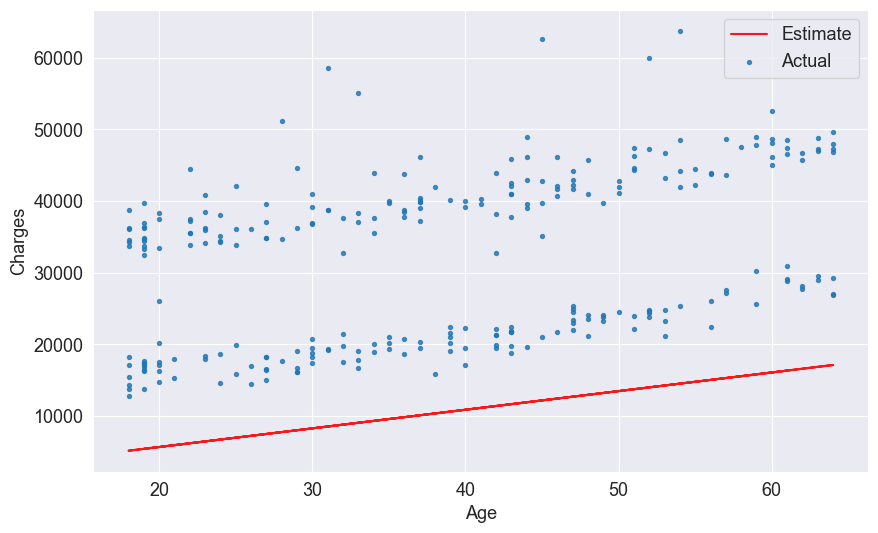

In [319]:
smoke_try_parameters(260, 500)

In [320]:
from sklearn.linear_model import LinearRegression
smoke_model = LinearRegression()

In [321]:
inputs = age_smoke[['age']]
targets = age_smoke.charges
print(f'inputs.shape : {inputs.shape}, \ntargets.shape : {targets.shape}')

inputs.shape : (274, 1), 
targets.shape : (274,)


In [322]:
smoke_model.fit(inputs, targets)

LinearRegression()

In [323]:
smoke_model.predict(np.array([[23], [37], [61]]))

array([27314.59297544, 31587.91940498, 38913.62185562])

In [324]:
prediction = smoke_model.predict(inputs)

In [327]:
inputs.head(5)

,age
0,19
11,62
14,27
19,30
23,34


In [328]:
rmse(targets, prediction)

10711.00334810241

In [329]:
# Finding the value of 'w' and 'b'
print(f'w : {smoke_model.coef_} \nb : {smoke_model.intercept_}')

w : [305.23760211] 
b : 20294.128126915966


RMSE Loss :  10711.00334810241


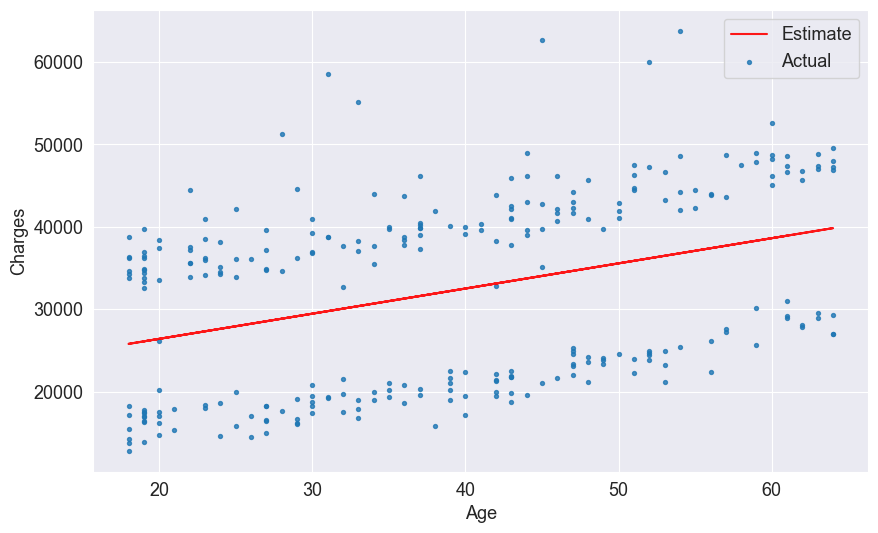

In [330]:
smoke_try_parameters(smoke_model.coef_, smoke_model.intercept_);

In [331]:
smoke_model.predict(np.array([[18], [21], [46], [62]]))

array([25788.40496489, 26704.11777122, 34335.05782397, 39218.85945773])

Predictions made by our model trained on 'Ordinary Least square' technique<br>Age 18 : Charge 25788<br> Age 21 : Charge 26704<br> Age 46 : Charge 34335<br> Age 62 : Charge 39218